# Simulated Annealing

![SA performance](./img/simulated_annealing.png)


In [112]:
from scipy.optimize import dual_annealing, minimize
import nevis
import numpy as np
import matplotlib.pyplot as plt

In [2]:
f = nevis.linear_interpolant()
points = []
pre_max = []
def wrapper(u):
    x, y = u
    points.append((x, y))
    z = f(x, y)
    if not pre_max:
        pre_max.append(z)
    else:
        pre_max.append(max(pre_max[-1], z))
    return -f(x, y)

In [10]:
points = []
pre_max = []
x_max, y_max = nevis.dimensions()
ret = dual_annealing(
        wrapper, 
        bounds=[(0, x_max), (0, y_max)],
        maxiter=2000,
        initial_temp=5e4,
        restart_temp_ratio=1e-4,
    )

In [11]:
x, y = ret.x
z = -ret.fun

nevis.print_result(x, y, z)

Good job!
You landed at an altitude of 1338m.
  https://opentopomap.org/#marker=15/56.797132/-5.007679
You are 245m from the nearest named hill top, "Ben Nevis",
  ranked the 1st heighest in GB.
  http://hillsummits.org.uk/htm_summit/278.htm


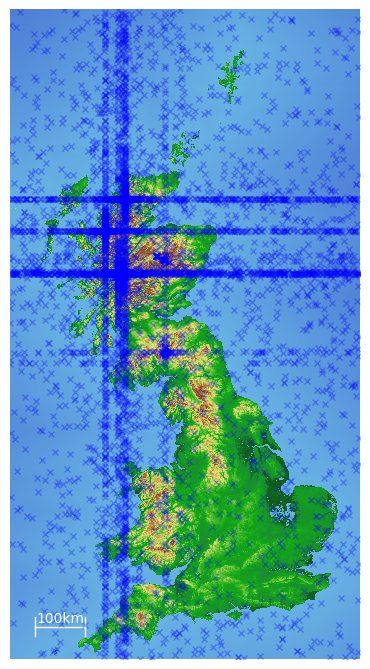

In [12]:
nevis.plot(
    points=np.array(points),
    zoom=1/40
)
plt.show()

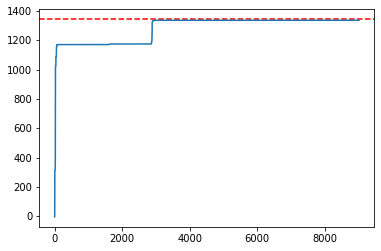

In [13]:

plt.axhline(y=1344.9, color='r', linestyle='--', label='Ben Nevis')
plt.plot(pre_max)
plt.show()

# Simulated annealing (Hand coded version)
![SA performance](./img/simulated_annealing_8.png)

In [156]:
points = []
pre_max = []
x_max, y_max = nevis.dimensions()

def simulated_annealing(func, maxiter, step_size, initial_temp, restart_temp_ratio):
    best = np.random.uniform((0, 0), (x_max, y_max))
    best_eval = func(best)

    curr, curr_eval = best, best_eval

    i = 0

    restart_cnt = 0
    for iteration in range(maxiter):

        t = initial_temp / float(i + 1)
        i += 1

        if t < initial_temp * restart_temp_ratio:

            local_ret = minimize(
                func, 
                curr, 
                bounds=[(0, x_max), (0, y_max)],
                method='Nelder-Mead',
                options={'fatol': 1e-4, 'xatol': 1e-4}
            )
            if local_ret.success and local_ret.fun < best_eval:
                # print('local search success')
                best, best_eval = local_ret.x, local_ret.fun
                # lx, ly = best
                # nevis.print_result(lx, ly, -best_eval)
            
            restart_cnt += 1
            t = initial_temp
            i = 0
            curr = np.random.uniform((0, 0), (x_max, y_max))
            curr_eval = func(curr)
            candidate, candidate_eval = curr, curr_eval
        
        else:
            candidate = np.random.normal(curr, step_size)
            if candidate[0] < 0: candidate[0] = 0
            if candidate[1] < 0: candidate[1] = 0
            if candidate[0] > x_max: candidate[0] = x_max
            if candidate[1] > y_max: candidate[1] = y_max
            candidate_eval = func(candidate)
        
        if candidate_eval < best_eval:
            best, best_eval = candidate, candidate_eval
        
        diff = candidate_eval - curr_eval
        if diff < 0 or np.random.random() < np.exp(-diff / t):
            curr, curr_eval = candidate, candidate_eval
    
    print('restart count: ', restart_cnt)
    return best, best_eval

(x, y), z = simulated_annealing(wrapper, 
    maxiter=20000, 
    step_size=2e4, 
    initial_temp=5e4, 
    restart_temp_ratio=1e-3
)
nevis.print_result(x, y, -z)

restart count:  19
Good job!
You landed at an altitude of 1338m.
  https://opentopomap.org/#marker=15/56.797132/-5.007679
You are 245m from the nearest named hill top, "Ben Nevis",
  ranked the 1st heighest in GB.
  http://hillsummits.org.uk/htm_summit/278.htm


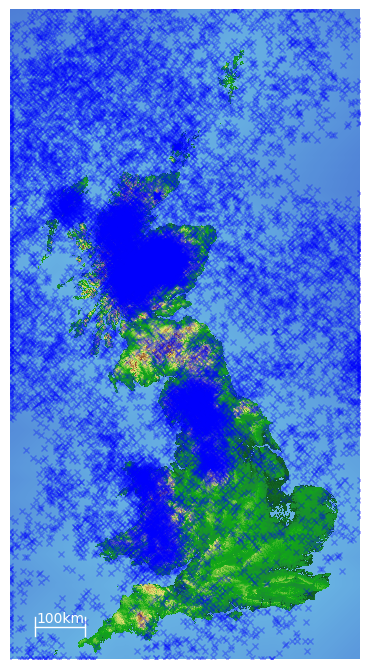

In [157]:
nevis.plot(
    points=np.array(points),
    zoom=1/40
)
plt.show()

23307


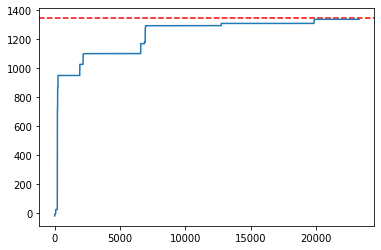

In [158]:
print(len(points))
plt.axhline(y=1344.9, color='r', linestyle='--', label='Ben Nevis')
plt.plot(pre_max)
plt.show()